# The numpy.random package
---

In [ ]:
# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Generating plots
import matplotlib.pyplot as plt

## Randomness

Randomness is generally thought of as the unpredictability of an event’s outcome ahead of time[x]. Even if one outcome is more likely than another, we cannot be certain which outcome will happen until we observe it. This randomness is the basis of many common games of chance, such as flipping a coin or rolling dice. 

## NumPy's Random Module

In data science, we will want sometimes want to generate random data for the purposes of simulation[x]. This can save time. For example, it is much faster to code and run a simulation of a million coin tosses than to physically toss a coin a million times. We can also use simulated data to test and refine models, or to supplement existing data. Random data simulation has also been proposed as a solution to a problem in medical scientific research, where data is often not open due to concerns about patient confidentiality[x]. A compromise is to simulate the patient data so that the simulated dataset is statistically identical to the original. These “synthetic” datasets can then be open to the public, with any potential identifying variables hidden by the randomising process [X].

Since computing is completely deterministic, it would be incredibly difficult for one to generate truly random data[x]. However, the outcome of an event appearing random to an observer might not be due to the fact multiple outcomes are possible. The outcome might instead appear random due to the observer’s ignorance. If the observer had all the relevant information about an event, they would be able to perfectly state the outcome ahead of time, but if they lack the relevant information, then other outcomes might appear equally plausible. Computers take advantage of this ignorance of the user with pseudo-random number generators (PRNGs) [x]. The coding is completely deterministic, but if the user lacks necessary information about how the algorithm works, then the outcome is considered random from the user’s perspective.

While python has a built-in random module, a more powerful alternative is provided by NumPy’s random module. NumPy is a package that allows for fast calculations with arrays[x]. This feature extends to the generation of random values, where NumPy random can quickly generate not only single random values, but can also generate random arrays. As noted by Wes McKinney when discussing NumPy’s random module, “Python’s built-in random module, by contrast, only samples one value at a time… (and) numpy.random is well over an order of magnitude faster for generating very large samples”[x]. This makes NumPy a more powerful choice when it comes to generating larger random datasets for simulations. Many of NumPy random’s methods will now be discussed in turn. 


The numpy.random documentation recommends that before calling on any methods, that a new generator is called using the default PRNG, which can be done with the following code. The varible that points to this code will be used throughout to call on numpy.random's functions. 

The sections below will begin with the structure of the code needed to run each function, as presented in the numpy.random v1.21 documentation. For example, the code presented for the integers function is random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False). This means that to run our code we will use the variable assigned to our random generator followed by a period and the function name, then followed by parantheses which contain the arguments that we wish use. Arguments without equal signs are neccessary and must be passed, otherwise the code will not runreturn an error. Arguments with equal signs are optional. If these are not passed by the user, then numpy.random will just use default values for these arguments. 

In [2]:
# Construct a new Generator with the default BitGenerator (PCG64)
rng = np.random.default_rng()

## "Simple Random Data" Functions
---------------------------------

There are four ‘Simple Random Data’ functions for the fast generation of random data. 

### **integers**

random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

The integers function is used for the generation of integers, from a single integer to entire arrays. If only a single number is passed as an argument, the function will generate an integer between 0 and the number entered, with the higher number exclusive. In the example below, as 3 is entered as the argument, the randomly generated integer will be either 0, 1, or 2. 

In [15]:
# Generate a single integer.

random_int = rng.integers(3)
random_int

2

If we do not enter a number, the code will not work, and will return an error message that at least one argument needs to be given.

In [14]:
# This will return an error as no argumentshave been passed.
rng.integers()

TypeError: integers() takes at least 1 positional argument (0 given)

We can generate more than one number by specifying the size. For the below example, entering the size as 20 will result in 20 random intergers being returned in an array.

In [12]:
# Generates an array of 20 random integers from 0-4 (5 not inclusive).
rng.integers(5, size = 20)

array([2, 3, 3, 0, 2, 3, 4, 4, 0, 1, 4, 1, 0, 0, 2, 3, 3, 3, 1, 1],
      dtype=int64)

It is worth noting that running the same code again will lead to a brand new array of 20 random numbers. 

In [19]:
# Generates an array of 20 random integers from 0-4 (5 not inclusive).
random_integers2 = rng.integers(5, size = 20)
random_integers2

array([1, 4, 2, 0, 4, 4, 0, 2, 0, 2, 1, 1, 3, 0, 1, 4, 4, 0, 4, 3],
      dtype=int64)

While we do not need to assign variables for the code to work, by doing so we can reuse this array further in our code should we wish to do so. However, once the session is closed and the code is rerun at a later time, a new random array will be created and stored to the variable, with the original instance lost. If we want a random array that is consistantly reproducable, this will be dealt with in the section on seeding.

In [20]:
# Recalling the variable to see the randomly generated array produced earlier
random_integers2

array([1, 4, 2, 0, 4, 4, 0, 2, 0, 2, 1, 1, 3, 0, 1, 4, 4, 0, 4, 3],
      dtype=int64)

We can specify the lowest and highest random numbers that can be selected. In this instance the lowest number is 10, which is inclusive. High being 25 means 24 is the highest number, as high is exclusive. We can also create a multidimensional array by specifying the size. In this instance size=(2,4) returns a 2x4 array

In [22]:
# Generate a random 2x4 array of numbers between 10 and 24.
rng.integers(low=10, high=25, size=(2,4))

array([[13, 11, 21, 24],
       [15, 15, 18, 15]], dtype=int64)

### **random**

random.Generator.random(size=None, dtype=np.float64, out=None)

The random function is used to return floating point numbers between 0.0 and 1.0.

Unlike with the integers function, random will work without passing an argument. If we do this, it will return a single floating point value betweeen 0.0 and 1.0.

In [17]:
# Generate a single random float between 0.0 and 1.0.
rng.random()

0.4030250832620421

If we need more than one random float, we can do this by specifying the size to the amount of random numbers we would like returned.

In [25]:
# Returns 20 random floats between 0.0 and 1.0
rng.random(size = 20)

array([0.42194249, 0.71796406, 0.90449519, 0.3701903 , 0.90314291,
       0.18178279, 0.40685708, 0.48607531, 0.70358656, 0.25475897,
       0.52509826, 0.66945978, 0.68440788, 0.00480666, 0.70213566,
       0.80814029, 0.76746261, 0.97993985, 0.86184173, 0.65302608])

Multidimensional arrays can be generated by adding more than one value to the size argument in parentheses.

In [23]:
# Create 3 random arrays of 5 floats between 0.0 and 1.0
rng.random(size = (3, 5))

array([[0.32252695, 0.60957133, 0.92386631, 0.36566726, 0.78803775],
       [0.59752522, 0.3206327 , 0.5059239 , 0.49500167, 0.31047462],
       [0.78570488, 0.79939203, 0.35872539, 0.11047249, 0.29907112]])

Since the power of NumPy is in fast calculations with arrays, we can take advantage of this to create random arrays of values greater than 1.0. The example below multiplies the randomly generated floats by 10 before returning the array to us.

In [24]:
# Multiplying a randomly created array of floats by 10.
10 * rng.random(size = 5)

array([5.8246178 , 4.13706449, 3.47690347, 2.1961966 , 2.29567561])

### **choice**

random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

The choice function takes an array as an argument, and returns random values from that array to the user based on the parameters passed in by the user. Entering a single integer as an arguments means choice will select a random integer in the range of numbers from 0 up to the entered number.

In [30]:
# Chooses a random number between 0 and 5 to return to the user
rng.choice(5)

3

We can ask choice to return more values by specifying them alongside the initial number. In the below example, (10,3) means the cdode will return 3 numbers between 0 and 10. 

In [29]:
# Takes 10 as an input and then selects 3 random ints up to 10
rng.choice(10, 3)

array([2, 9, 5], dtype=int64)

In the above examples, the exact same outcome can be achieved by using the integers function. The below examples show where choice differs. For example, we can pass in a list of strings and ask choice to return a random item from that list to us. If we have a list of colours, and then pass that list as an argument using choice, we will get one colour randomly returned. 

In [31]:
# A list of colours
colours = ["red", "blue", "green", "black", "yellow"]

# Using choice to randomly pick a colour
rng.choice(colours)

'blue'

We can again get more than one value returned by specifying the size. By default, when selecting multiple items from a list, choice will replace the item chosen each time. That is to say, if we have 5 items in a list and choice picks one, the chosen item will be returned to the list where it can potentially be chosen again. If we don't want this to happen, we can set replacement to false. This means that when something is randomly chosen from our 5 item list, the chosen item will not be returned and cannot be selected again, meaning only one of the remaining 4 items from the list can be chosen. 

In [32]:
# Selecting 3 random colours without replacement. 
rng.choice(colours, size= 3, replace=False)

array(['red', 'yellow', 'blue'], dtype='<U6')

We can add probabilitys to bias the outcome chosen in certain directions. With our list of colors, we can bias the outcome by adding an array of values with the same amount of values as there are items in our list, which in this instance is 5. The values of p should add to 1. With the last value being the highest at 0., this means the last item in our list (yellow), is more likely to be randomly chosen, followed by black with a value of 0.3. The remaining items may still be chosen, but will not be chosen as frquently were the code run multiple times. 

In [33]:
# Select two colours randomly with replacement and a biased outcome
rng.choice(colours, size=2, p = np.array([0.1, 0.1, 0.1, 0.3, 0.4]))

array(['red', 'yellow'], dtype='<U6')

### **bytes**

random.Generator.bytes(length)

The bytes function only takes a single argument, and returns random bytes of the length passed. Random byte generation can be used in cryptography. However, the NumPy documentation warns against using the random package for security purposes[x].

In [34]:
# Return 5 random bytes
rng.bytes(5)

b'\xb7\xb3\x85\xdf2'

## "Permutations" functions
---

The three Permutation methods can all be used for the random rearranging of items within an array.

### **shuffle**

random.Generator.shuffle(x, axis=0)

The shuffle function takes in an a sequence or an array and returns everything in a new random order. Below we will create a variable containing the integers from 0-9 that we will then shuffle.

In [36]:
# Assign the range 0-9 (10 not inclusive) to the variable digits
digits = np.arange(10)
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
# Shuffle the array digits
rng.shuffle(digits)

Of note is that the shuffle function will alter the order of an array in place, which changes the contents of a variable. This means in this instance that the variable digits will no longer point to the array ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]). Rather, it will return the order they were shuffled into.

In [38]:
# Returnn the shuffled array
digits

array([7, 3, 0, 8, 9, 6, 2, 1, 4, 5])

Shuffle can also be used to randomly reorder a list containing strings. 

In [44]:
# Create a list of strings for the digits 0-9
string_digits = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
string_digits

['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [46]:
# Shuffle the list of strings and return it
rng.shuffle(string_digits)
string_digits

['four', 'two', 'five', 'eight', 'three', 'one', 'six', 'seven', 'nine']

Shuffle can also be used to randomly reorder arrays, but it should be noted that the reordering will only take place along one dimension at a time. This means that shuffle can change the order of a row or a column, but it will not shuffle an item to both a new row and a new column at the same time.

In [47]:
# Create a 3x3 array containing 0-8
three_by_three = np.arange(9).reshape(3, 3)
three_by_three

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

By default, using shuffle on an array will rearrange the position of rows but will leave the items from each row in the original order

In [48]:
rng.shuffle(three_by_three)
three_by_three

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

However, if we set the axis to 1 as an argument, shuffle will instead change the order of the columns rather than rows.

In [50]:
# Generating a random 5x5 array
five_by_five = rng.integers(low=1, high=7, size = (5,5))
five_by_five

array([[6, 3, 6, 2, 5],
       [6, 4, 3, 4, 6],
       [3, 2, 5, 3, 1],
       [1, 1, 5, 1, 1],
       [3, 3, 2, 4, 6]], dtype=int64)

In [51]:
# Randomly shuffle the order of the 5x5's columns
rng.shuffle(five_by_five, axis=1)
five_by_five

array([[3, 2, 6, 5, 6],
       [4, 4, 3, 6, 6],
       [2, 3, 5, 1, 3],
       [1, 1, 5, 1, 1],
       [3, 4, 2, 6, 3]], dtype=int64)

### **permutation**

random.Generator.permutation(x, axis=0)

The permutation function will also return the entire contents of an array or list that has been passed to it in a new random order, but unlike shuffle, permutation will leave the original array intact and unchanged.

In [24]:
# Assign the range 0-9 (10 not inclusive) to the variable digits2
digits2 = np.arange(10)
digits2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
# Return the digits list in a new, random order
rng.permutation(digits2)

array([2, 9, 6, 7, 1, 3, 5, 4, 8, 0])

In [26]:
# The original order of the variable digits2 is unchanged
digits2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

By default, permutation will rearrange multidimensional arrays in a similar manner to shuffle - it will move entire rows to a new position, but leave the order within each row unchanged.

In [52]:
# A 6x6 array
six_by_six = np.arange(36).reshape(6,6)
six_by_six

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [53]:
# Randomly reorder the 6x6 array with permutation.
rng.permutation(six_by_six)

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [12, 13, 14, 15, 16, 17],
       [ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [18, 19, 20, 21, 22, 23]])

Permutation performs different to shuffle when axis is set to 1, however. While setiing to axis to 1 when using shuffle would move entre columns, in permutation it will instead shuffle the contents within each row, but leave each row in its original position. 

In [90]:
# Shuffle the order of the contents of each row in the 6x6 array
rng.permutation(six_by_six, axis=1)

array([[ 5,  2,  3,  4,  0,  1],
       [11,  8,  9, 10,  6,  7],
       [17, 14, 15, 16, 12, 13],
       [23, 20, 21, 22, 18, 19],
       [29, 26, 27, 28, 24, 25],
       [35, 32, 33, 34, 30, 31]])

### **permuted**

random.Generator.permuted(x, axis=None, out=None)

The permuted function is a more recent addition, as of numpy 1.20[x]. Permuted is more flexible than either shuffle or permutation. It can be used to rearrange content in-place, like with shuffle, or create a new rearranged copy, like with permutation. By only passing in an array, permuted will leave the original array intact, as permutations does.

In [58]:
# Generate a random 4x4 array.
# Negative random numbers can also be generated.
four_by_four = rng.integers(low=-20, high=-1, size = (4,4))
four_by_four

array([[ -5,  -3,  -5,  -9],
       [-18, -20, -13,  -5],
       [-18, -19,  -9,  -2],
       [ -6, -19,  -8, -16]], dtype=int64)

In [59]:
# Reorder the 4x4 array.
rng.permuted(four_by_four)

array([[ -9, -18,  -3,  -5],
       [-18, -19, -20,  -8],
       [ -5,  -5,  -2, -13],
       [ -9, -19, -16,  -6]], dtype=int64)

In [68]:
# Calling 4x4 to show the original is unchanged.
four_by_four

array([[ -5,  -3,  -5,  -9],
       [-18, -20, -13,  -5],
       [-18, -19,  -9,  -2],
       [ -6, -19,  -8, -16]], dtype=int64)

We can compare and contrast shuffle, permutation, and permuted further by reusing the 3x3 array example from before.

In [69]:
# The 3x3 array of 0-9 that was randomly reordered using shuffle.
three_by_three

array([[5, 6, 0],
       [7, 1, 8],
       [2, 4, 3]])

Permuted will shuffle the values within each row, but leave the rows in place if we set axis to 1. This is similar to using permutation with axis set to 1

In [70]:
# Use permuted to reorder the 3x3 array.
permuted_three_by_three = rng.permuted(three_by_three, axis=1)
permuted_three_by_three

array([[5, 6, 0],
       [8, 1, 7],
       [2, 4, 3]])

Permuted returned a copy, leaving the original array reordered by shuffle unchanged

In [71]:
# Recalling the shuffled 3x3 array
three_by_three

array([[5, 6, 0],
       [7, 1, 8],
       [2, 4, 3]])

However, we can use permuted to overwrite the original array by passing the variable of the original array as an argument using out. If we don't pass in an axis argument, then the output withh be rearranged across both columns and rows, which neither shuffle nor permutation can do.

In [72]:
# Using permuted to change the content of the original 3x3 array
permuted_three_by_three = rng.permuted(three_by_three, out=three_by_three)

We can show that the new permuted 3x3 array and the original now have the same content.

In [73]:
# Calling the 3x3 array
three_by_three

array([[5, 4, 2],
       [7, 3, 0],
       [1, 8, 6]])

In [76]:
# Calling the permuted 3x3 array
permuted_three_by_three

array([[5, 4, 2],
       [7, 3, 0],
       [1, 8, 6]])

In [77]:
# Show that the two 3x3 arrays have the same content
three_by_three is permuted_three_by_three

True

## Distributions
---

### **binomial**

random.Generator.binomial(n, p, size=None)

In [37]:
# A binomial distribution tracks trials and records a binary success/failure 
# outcome of trials. 

In [38]:
# n is the number of trials 
n = 20

# p = probability of success, which must be between 0 and 1. 
# For example, a fair coin has a 50/50 change of being either heads of tails
# Therefore to simulate a fair coin, p = 0.5
p = 0.5

In [39]:
# The third argument is the number of tests. 
# That means in this example, a coin is flipped 20 times
# And there is 1000 instances of this
coin_flip = rng.binomial(n, p, 100)

In [40]:
# We can take the resulting array as giving us the number of heads
# After every 20 coin flips
coin_flip

array([10, 12,  8,  9,  6, 13,  7, 11, 15,  8, 12, 11, 11, 12,  9, 13, 15,
       10,  7,  7, 12, 11, 11,  9, 14, 12,  8, 11,  9, 15, 10, 11, 12, 10,
       10, 12, 10,  9,  6, 11,  9, 10, 10, 13, 11,  8,  9,  7,  9,  8,  9,
        4, 13,  9,  8,  9, 12,  9,  5, 10, 11, 10, 10, 12, 10, 13, 12, 10,
        8,  5, 11, 12,  9,  8,  9, 15, 12, 10, 12,  6,  7, 13, 12,  7, 12,
        6,  5,  9,  8,  7, 11, 11, 10, 10,  9,  8, 12, 11, 11,  7],
      dtype=int64)

(array([ 4.,  4.,  8., 10., 16., 16., 15., 16.,  6.,  5.]),
 array([ 4. ,  5.1,  6.2,  7.3,  8.4,  9.5, 10.6, 11.7, 12.8, 13.9, 15. ]),
 <BarContainer object of 10 artists>)

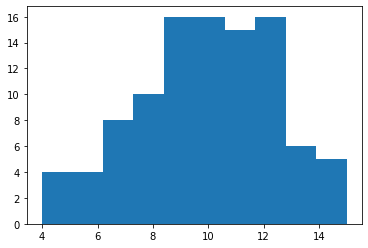

In [67]:
# Plotting the randomly generated data
plt.hist(coin_flip, bins=10)

### **normal**

random.Generator.normal(loc=0.0, scale=1.0, size=None)

In [42]:

# Mean
mu = 100

#Standard Deviation
sigma = 15

In [43]:
# A random example of 100 samples from a normal distribution
normal = np.random.default_rng().normal(mu, sigma, 100)

In [44]:
normal

array([ 94.34010987, 108.09248559, 115.06812219,  92.30900731,
       106.99199726,  99.11550455,  96.34071019, 122.56008391,
        85.91363276, 105.9526565 ,  72.39894391,  72.14381639,
       123.57413036,  90.92037204,  88.54433761,  87.79022941,
        84.66742007, 117.55367729, 111.55800485,  92.34502784,
       120.59264625,  97.47280601,  83.37335412, 112.77690783,
       106.10380144,  91.06081623,  94.78983752, 110.51551979,
       112.78021562, 133.34773924, 112.45059795, 100.90591921,
       115.14421637, 113.81733555, 103.07192205, 102.99249111,
       102.44743894, 129.16302527, 120.21460284, 101.84428898,
       101.63578826,  83.27918514,  98.02163036,  93.27284111,
        82.43743184,  82.80579377,  97.89070615, 110.00967504,
        84.36291204,  92.84530932, 125.76624008, 102.63929233,
       107.0599853 , 120.4125293 ,  94.34052273, 106.18443561,
        60.16835263,  97.96626465,  90.30057219, 123.36764781,
       112.00938129, 123.21507356,  96.98140833, 120.66

(array([1., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 2., 1., 1., 1., 5., 3.,
        2., 1., 2., 4., 3., 3., 4., 4., 6., 3., 3., 6., 4., 1., 6., 1., 2.,
        2., 6., 2., 3., 2., 0., 4., 0., 4., 0., 2., 0., 1., 0., 0., 2.]),
 array([ 60.16835263,  61.644094  ,  63.11983537,  64.59557674,
         66.07131811,  67.54705948,  69.02280085,  70.49854222,
         71.97428359,  73.45002496,  74.92576633,  76.4015077 ,
         77.87724907,  79.35299044,  80.82873181,  82.30447318,
         83.78021455,  85.25595592,  86.73169729,  88.20743866,
         89.68318003,  91.1589214 ,  92.63466277,  94.11040414,
         95.58614551,  97.06188688,  98.53762825, 100.01336962,
        101.48911099, 102.96485236, 104.44059373, 105.9163351 ,
        107.39207647, 108.86781784, 110.34355921, 111.81930058,
        113.29504195, 114.77078332, 116.24652469, 117.72226605,
        119.19800742, 120.67374879, 122.14949016, 123.62523153,
        125.1009729 , 126.57671427, 128.05245564, 129.52819701,
      

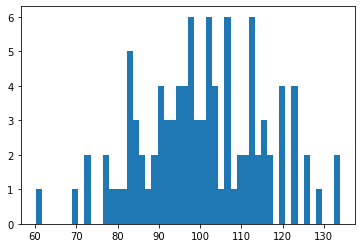

In [66]:
# While the smaller number of samples uaually are at the extremes, 
# a smaller sample size generally leads to a plot that only vaguely resembles a bell shaped curve
plt.hist(normal, bins = 50)

##### Repeating the random generation with a higher sample size of 10000
normal_higher = np.random.default_rng().normal(mu, sigma, 10000)

(array([  2.,   2.,   3.,   7.,  10.,  10.,  23.,  21.,  34.,  43.,  51.,
         86., 114., 138., 193., 227., 262., 357., 387., 419., 465., 550.,
        527., 589., 553., 522., 542., 539., 514., 467., 431., 346., 316.,
        280., 235., 186., 143.,  98.,  85.,  70.,  47.,  38.,  20.,  11.,
         13.,  13.,   7.,   1.,   1.,   2.]),
 array([ 46.12303377,  48.27940065,  50.43576754,  52.59213442,
         54.74850131,  56.9048682 ,  59.06123508,  61.21760197,
         63.37396886,  65.53033574,  67.68670263,  69.84306952,
         71.9994364 ,  74.15580329,  76.31217018,  78.46853706,
         80.62490395,  82.78127083,  84.93763772,  87.09400461,
         89.25037149,  91.40673838,  93.56310527,  95.71947215,
         97.87583904, 100.03220593, 102.18857281, 104.3449397 ,
        106.50130659, 108.65767347, 110.81404036, 112.97040724,
        115.12677413, 117.28314102, 119.4395079 , 121.59587479,
        123.75224168, 125.90860856, 128.06497545, 130.22134234,
        132.377709

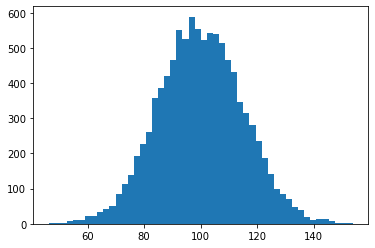

In [65]:
# The plot should more closely resemble a bell shaped curve as the sample size increases
plt.hist(normal_higher, bins = 50)

### **uniform**

random.Generator.uniform(low=0.0, high=1.0, size=None)

In [48]:
# Generating 100 random floats between 1 and 6
uniform = np.random.default_rng().uniform(1,6,100)

In [49]:
uniform

array([2.6664247 , 4.39237285, 3.14896004, 1.28850475, 2.16008835,
       4.77841828, 1.06624063, 3.65952008, 4.79283005, 4.33774761,
       2.35340697, 1.11290033, 4.43709777, 4.38867256, 2.17816076,
       4.46352192, 3.13268352, 1.76148447, 2.37852405, 3.64641933,
       2.54629339, 5.93193075, 3.08958549, 4.65292312, 1.55936813,
       1.99707288, 4.66448979, 3.52101052, 5.19307473, 4.27923099,
       1.33698599, 1.68045602, 5.91484732, 5.03604974, 3.53093675,
       5.77751366, 1.4991321 , 5.75586642, 3.42644853, 2.34662023,
       4.84787375, 3.16331167, 3.7154401 , 1.40124981, 5.22963029,
       3.42277278, 1.98406894, 3.54844155, 3.85837066, 3.35106885,
       2.26909275, 5.37062934, 1.64493522, 3.83005657, 5.22545184,
       5.56267334, 1.00129606, 2.98457161, 1.73466925, 5.888295  ,
       1.20015732, 5.5691276 , 3.46648486, 3.120789  , 3.96165178,
       2.05637484, 2.60508564, 3.97678715, 1.88278482, 3.8333665 ,
       3.87491133, 2.385806  , 2.63229634, 5.23293855, 4.59392

(array([26., 19., 13., 14., 14., 14.]),
 array([1.00129606, 1.8230685 , 2.64484095, 3.4666134 , 4.28838585,
        5.1101583 , 5.93193075]),
 <BarContainer object of 6 artists>)

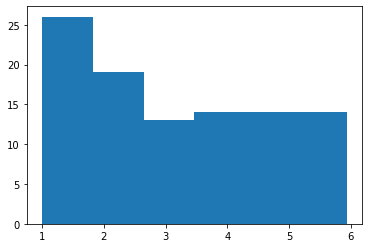

In [50]:
# As the sample size is quite small, the resulting plot may not appear uniform
# which is to be expected
# set bins to 6 as all random numbers should fall between 1 and 6
plt.hist(uniform, bins=6)

In [51]:
# Repeating the random generation with a higher sample size of 10000
uniform_higher = uniform = np.random.default_rng().uniform(1,6,10000)

(array([1638., 1665., 1668., 1638., 1678., 1713.]),
 array([1.00000402, 1.83333032, 2.66665663, 3.49998293, 4.33330924,
        5.16663554, 5.99996185]),
 <BarContainer object of 6 artists>)

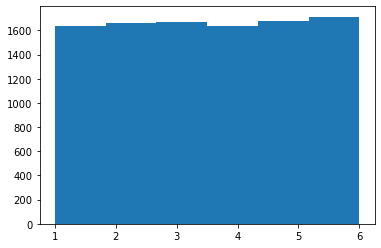

In [52]:
# As the sample size increases, the distribition becoms more smooth
plt.hist(uniform_higher, bins=6)

### **poisson**

random.Generator.poisson(lam=1.0, size=None)

In [53]:
poisson = rng.poisson(100, 10000)

In [54]:
poisson

array([102, 115,  99, ...,  91,  95,  99], dtype=int64)

(array([   2.,    6.,   15.,   37.,   99.,  153.,  311.,  506.,  685.,
         849., 1114., 1144., 1545., 1023.,  828.,  625.,  425.,  291.,
         152.,   87.,   56.,   19.,   17.,    7.,    4.]),
 array([ 63.  ,  66.08,  69.16,  72.24,  75.32,  78.4 ,  81.48,  84.56,
         87.64,  90.72,  93.8 ,  96.88,  99.96, 103.04, 106.12, 109.2 ,
        112.28, 115.36, 118.44, 121.52, 124.6 , 127.68, 130.76, 133.84,
        136.92, 140.  ]),
 <BarContainer object of 25 artists>)

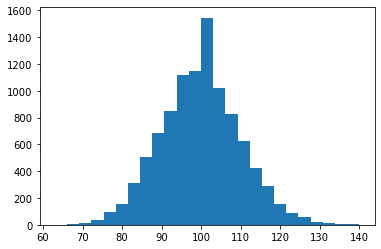

In [55]:
plt.hist(poisson, bins=25)

### **exponential**

random.Generator.exponential(scale=1.0, size=None)

In [56]:
exponential = rng.exponential(10.0, 100)

In [57]:
exponential

array([12.15942781,  1.06144208, 13.33410151,  1.15440816,  3.75654777,
       11.31011216, 10.19066834, 11.52980355, 14.99154657,  1.09085708,
        1.66265158,  0.61406838,  0.98794518,  6.74048008, 13.05685762,
        0.35254848,  6.15719189,  1.39796747,  4.614146  , 20.41080229,
       12.2969735 ,  1.91827927,  6.51875782,  3.38266197, 40.18308252,
        3.03185349,  2.95681291, 33.86206027, 15.66983149, 11.27004122,
       12.39438531,  8.03016263,  0.16024796,  2.38719192,  3.06276015,
       11.31631494,  4.724303  ,  2.66076421,  3.71780905, 10.03262602,
        3.96144233,  0.34249183,  1.85509251,  3.81729103,  3.53519542,
        7.27262703,  2.16418839,  4.64369083,  6.83474825,  4.789887  ,
        0.87353855,  8.54651364,  8.75176829, 15.97194037, 22.38594835,
       10.39372913,  5.53252321,  6.78690805, 10.35473036,  7.56136338,
        5.69742773, 25.59580294,  1.64611349,  2.95579692,  8.39184204,
       10.91485037,  5.04968414,  0.60756735,  6.30402483, 21.36

(array([11.,  8.,  8.,  5.,  6.,  4.,  4.,  5.,  5.,  3.,  5.,  2.,  5.,
         5.,  3.,  2.,  4.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,
         1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0.16024796,  0.96070465,  1.76116134,  2.56161803,  3.36207472,
         4.16253141,  4.9629881 ,  5.76344479,  6.56390148,  7.36435818,
         8.16481487,  8.96527156,  9.76572825, 10.56618494, 11.36664163,
        12.16709832, 12.96755501, 13.76801171, 14.5684684 , 15.36892509,
        16.16938178, 16.96983847, 17.77029516, 18.57075185, 19.37120854,
        20.17166524, 20.97212193, 21.77257862, 22.57303531, 23.373492  ,
        24.17394869, 24.97440538, 25.77486207, 26.57531876, 27.37577546,
        28.17623215, 28.97668884, 29.77714553, 30.57760222, 31.37805891,
        32.1785156 , 32.97897229, 33.77942899, 34.57988568, 35.38034237,
        36.18079906, 36.98125575, 37.78171244, 38.58216913,

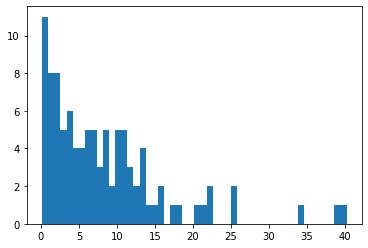

In [58]:

plt.hist(exponential, bins=50)

In [59]:
# Repeating the random generation with a higher sample size of 10000
exponential_higher = rng.exponential(10.0, 10000)

(array([1.841e+03, 1.445e+03, 1.202e+03, 1.046e+03, 8.190e+02, 6.750e+02,
        5.690e+02, 4.310e+02, 3.870e+02, 2.980e+02, 2.180e+02, 1.910e+02,
        1.730e+02, 1.330e+02, 1.040e+02, 8.300e+01, 7.100e+01, 6.500e+01,
        5.700e+01, 3.300e+01, 2.800e+01, 3.000e+01, 2.000e+01, 1.300e+01,
        1.500e+01, 7.000e+00, 7.000e+00, 7.000e+00, 8.000e+00, 3.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([8.98733724e-04, 2.00859117e+00, 4.01628362e+00, 6.02397606e+00,
        8.03166850e+00, 1.00393609e+01, 1.20470534e+01, 1.40547458e+01,
        1.60624383e+01, 1.80701307e+01, 2.00778231e+01, 2.20855156e+01,
        2.40932080e+01, 2.61009005e+01, 2.81085929e+01, 3.01162854e+01,
        3.21239778e+01, 3.41316702e+01, 3.61393627e+01, 3.81470551e+01,
        4.015474

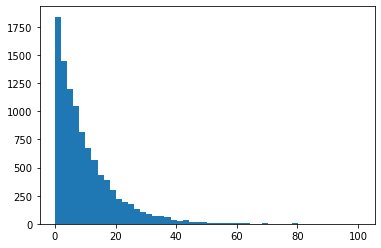

In [60]:
# As the sample size increases, the distribition becoms more smooth
plt.hist(exponential_higher, bins=50)

## Seeds
---

In [61]:
# Calling the default random number generator but with a seed for reporoducable outcomes
rng_seeded1 = np.random.default_rng(seed=1246)
rng_seeded1.integers(5, size = 20)

array([4, 3, 1, 2, 1, 3, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 4, 3],
      dtype=int64)

In [62]:
# A new generator with the same seeding of 1246 will result in the same output
rng_seeded2 = np.random.default_rng(seed=1246)
rng_seeded2.integers(5, size = 20)

array([4, 3, 1, 2, 1, 3, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 4, 3],
      dtype=int64)

## References